# QAOA Optimization Results

This notebook demonstrates the accessible information post QAOA optimization with the results object. The user can access different aspects of the optimization run through the results object. 

Let's start with a few import statements

In [1]:
import networkx as nx
import numpy as np
from openqaoa.problems.problem import MinimumVertexCover, NumberPartition, Knapsack
import matplotlib.pyplot as plt
from pprint import pprint
from openqaoa.devices import create_device, DeviceLocal

## Problem Statement
We begin by creating the problem statement (and its subsequent translation into QUBO) to be optimized using QAOA. As an example, we consider the Knapsack problem class for this tutorial. The user can pass the following parameters to define a Knapsack problem:
- Item values
- Item weights
- Knapsack weight capacity
- Penalty coefficient

For this notebook, however, we create a problem instance using the `random_instance` method of the class

In [2]:
kp_prob = Knapsack.random_instance(n_items=5, quantum=True,seed=1234)
kp_qubo = kp_prob.get_qubo_problem()
print(kp_qubo.asdict())

{'terms': [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3], [4, 5], [4, 6], [4, 7], [8, 4], [5, 6], [5, 7], [8, 5], [6, 7], [8, 6], [8, 7], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [1, 4], [1, 5], [1, 6], [1, 7], [8, 1], [2, 4], [2, 5], [2, 6], [2, 7], [8, 2], [3, 4], [3, 5], [3, 6], [3, 7], [8, 3], [0], [1], [2], [3], [4], [5], [6], [7], [8]], 'weights': [8.0, 16.0, 32.0, 32.0, 64.0, 128.0, 4.0, 8.0, 16.0, 8.0, 8.0, 16.0, 8.0, 32.0, 16.0, 32.0, 4.0, 4.0, 8.0, 16.0, 8.0, 8.0, 8.0, 16.0, 32.0, 16.0, 16.0, 16.0, 32.0, 64.0, 32.0, 32.0, 32.0, 64.0, 128.0, 64.0, -4.0, -8.0, -16.0, -32.0, -2.0, -2.0, -6.5, -15.0, -7.5], 'constant': 217.0, 'n': 9}


## Optimization using OpenQAOA

We perform the usual steps of: 
- creating and configuring the QAOA model
- compiling the model with the problem statement
- optimizing the problem

In [3]:
from openqaoa.workflows.optimizer import QAOA  

In [4]:
q = QAOA()
q.set_circuit_properties(p=3, init_type='ramp')
q.compile(kp_qubo)

	  ### Summary ###
OpenQAOA has ben compiled with the following properties
Solving QAOA with  vectorized  on  local
Using p=3 with standard parameters initialsied as ramp
OpenQAOA will optimize using cobyla, with up to 100 maximum iterations


In [5]:
q.optimize()

optimization completed.


## Access the results object

Once the optimization process terminates, the user has access to information on the optimization process. This can be accessed in the form of a `Result` object, by calling the `.results` attribute of the model post optimization. 

In [12]:
result = q.results

In [13]:
result.most_probable_states

{'solutions_bitstrings': ['101011001'], 'bitstring_energy': 63.0}

### Re-run the problem with a different backend: Qiskit statevector_simulator

Using the qiskit statevector simulator as the backend, we repeat the optimization. One of the fields of the results object is the data stored on the measurement outcomes of the intermediate circuit executions during the optimization process. The user has access to either the intermediate statevectors if using a `statevector_simulator` backend, or `counts_dictionaries` if using shot-based simualtors or real QPUs. The size of these dictionaries will be proportional to the `n_shots` used. Since this feature may require storage of large data objects, this feature is turned `OFF` by default. The user can switch this `ON` by configuring the QAOA model by passing the `optimization progress` boolean as `True`. Apart from the `measurement_outcomes`, the results object also stores the `cost history`, `parameter log` and so on...

In [14]:
q_qiskit_sv = QAOA()
qiskit_dev = create_device(location='local',name='qiskit.statevector_simulator')
q_qiskit_sv.set_device(qiskit_dev)

In [18]:
q_qiskit_sv.compile(kp_qubo)

	  ### Summary ###
OpenQAOA has ben compiled with the following properties
Solving QAOA with  qiskit.statevector_simulator  on  local
Using p=1 with standard parameters initialsied as ramp
OpenQAOA will optimize using cobyla, with up to 100 maximum iterations. Each iteration will contain 100 shots
The total numner of shots is set to maxiter*shots = 10000


In [19]:
q_qiskit_sv.optimize()

optimization completed.


In [20]:
qiskit_results = q_qiskit_sv.results

In [22]:
qiskit_results.most_probable_states

{'solutions_bitstrings': ['101011001'], 'bitstring_energy': 63.0}

In [23]:
qiskit_results.evals

{'number of evals': 32, 'jac evals': 0, 'qfim evals': 0}

In [24]:
qiskit_results.intermediate

{'angles log': [[0.35, 0.35],
  [1.35, 0.35],
  [1.35, 1.35],
  [2.3262256650215862, 1.5667566629960008],
  [3.318286643264087, 1.6925144279591753],
  [2.0712692548147684, 1.9968697049913033],
  [1.6550340404772486, 2.2739044435086937],
  [2.4710636437100275, 2.2971436575877053],
  [1.8318634556968676, 1.9248637097636887],
  [2.145059842570777, 2.09776543908657],
  [2.119015879542814, 1.8813480194639565],
  [2.0128482319317182, 1.9746608309699099],
  [1.9847118572822078, 1.9882588794174774],
  [2.0237803754510963, 1.9453854020563701],
  [2.038608168880547, 1.950312588577454],
  [2.009448525622897, 1.9391613595194055],
  [2.0166144505369967, 1.9422733807878878],
  [2.0253363860853373, 1.9418024395993203],
  [2.023606382591243, 1.9531959643110814],
  [2.0256998979696346, 1.9419833111752611],
  [2.021993392900786, 1.944597118712317],
  [2.023094553996736, 1.9472141574250195],
  [2.024208988310705, 1.9445079253712187],
  [2.02394786409923, 1.9458440589344914],
  [2.0233279010916054, 1.9452

In [25]:
qiskit_results.optimized

{'optimized angles': [2.0237963905906975, 1.9451082376200115],
 'optimized cost': 188.3196978578714,
 'optimized measurement outcomes': array([-1.48260590e-02+5.53743663e-02j, -2.38249900e-02+3.60911549e-02j,
        -1.29977213e-02+2.29856289e-02j, -9.66447414e-03+4.86089641e-02j,
        -4.79625116e-02+1.26997228e-03j, -3.33542799e-02-1.16902990e-02j,
        -4.96639313e-02-1.24773694e-02j, -3.96374447e-02-4.33632836e-02j,
        -1.46206289e-02-2.85546200e-02j, -1.53914553e-02+1.72399229e-02j,
        -3.71966549e-02-2.51210986e-03j, -2.49935023e-02-1.65979787e-03j,
        -1.70253390e-02-3.62024668e-03j, -1.85570482e-02-9.41758539e-03j,
         1.37738353e-02+6.52829782e-03j,  4.09088931e-02-2.26698354e-02j,
         1.75115173e-02-1.31834893e-03j, -1.44519042e-02+7.37060566e-04j,
         1.50480983e-02+1.01511586e-02j,  2.52570598e-02+2.53910946e-02j,
        -1.68888824e-02+9.76739985e-03j,  2.39365380e-02+8.76511408e-03j,
        -1.84960353e-03+4.77506646e-03j, -3.2262477

### Qiskit shot simulator

Channing the backend again from a `statevector_simulator` backend to a `shot-based` backend, we can observe that the measurement outcome field is now populated by the `counts_dictionary` for `n_shots` executions.

In [26]:
q_qiskit_shot = QAOA()
qiskit_shot_dev = create_device(location='local',name='qiskit.shot_simulator')
q_qiskit_shot.set_device(qiskit_shot_dev)

In [28]:
q_qiskit_shot.compile(kp_qubo)

	  ### Summary ###
OpenQAOA has ben compiled with the following properties
Solving QAOA with  qiskit.shot_simulator  on  local
Using p=1 with standard parameters initialsied as ramp
OpenQAOA will optimize using cobyla, with up to 100 maximum iterations. Each iteration will contain 100 shots
The total numner of shots is set to maxiter*shots = 10000


In [29]:
q_qiskit_shot.optimize()

optimization completed.


In [30]:
q_qiskit_shot.results.most_probable_states

{'solutions_bitstrings': ['011001100', '010000101', '010000111'],
 'bitstring_energy': 65.0}

In [31]:
q_qiskit_shot.results.evals

{'number of evals': 28, 'jac evals': 0, 'qfim evals': 0}

In [32]:
q_qiskit_shot.results.intermediate

{'angles log': [[0.35, 0.35],
  [1.35, 0.35],
  [0.35, 1.35],
  [-0.10873058636808919, -0.5385754043019585],
  [0.1206347068159554, -0.09428770215097926],
  [-0.2577735149683522, -0.42110143761207997],
  [0.5481235293726243, -0.3536201270212849],
  [-0.12257222179881722, -0.03640514973862534],
  [0.22168130004631548, -0.16787157264267158],
  [0.16224645203012386, 0.02358283131787005],
  [0.05957675208640541, -0.10763596661660262],
  [0.14552190443717322, -0.11318717025361245],
  [0.1224461453281691, -0.06309024727856269],
  [0.10719497887564301, -0.10225729046471208],
  [0.12814601669840223, -0.09643604572216534],
  [0.12174104613693278, -0.08655393401656643],
  [0.11876378689235925, -0.09771676145376056],
  [0.12089669845556732, -0.09235222865687027],
  [0.12248456407776874, -0.09491438019953484],
  [0.12025009153633716, -0.09518533537401105],
  [0.12077760370362631, -0.09382079845791662],
  [0.12092145158435368, -0.09335418687821483],
  [0.12054429791377541, -0.09374887451755294],
  

In [33]:
q_qiskit_shot.results.optimized

{'optimized angles': [0.12077760370362631, -0.09382079845791662],
 'optimized cost': 106.09,
 'optimized measurement outcomes': {'010101100': 1,
  '111011010': 1,
  '111111110': 1,
  '110101001': 2,
  '111001001': 2,
  '001000011': 1,
  '001100100': 1,
  '111011101': 1,
  '001000110': 2,
  '110110100': 1,
  '100100110': 1,
  '010110010': 1,
  '110101101': 2,
  '100110101': 1,
  '010001101': 1,
  '101001101': 1,
  '100111000': 1,
  '011001010': 1,
  '100010110': 1,
  '001110100': 1,
  '101101101': 1,
  '101101000': 1,
  '110011110': 1,
  '101010111': 1,
  '011001100': 3,
  '100111110': 1,
  '101010010': 1,
  '101111001': 1,
  '110111000': 1,
  '010011011': 1,
  '000101001': 2,
  '101011011': 1,
  '110001110': 1,
  '100111011': 1,
  '101100001': 1,
  '000100100': 1,
  '101011001': 1,
  '100101101': 1,
  '110011111': 1,
  '000111010': 1,
  '110111010': 1,
  '111000100': 1,
  '010001001': 1,
  '111010110': 1,
  '001000010': 2,
  '001010010': 1,
  '100001111': 1,
  '001010110': 1,
  '101011

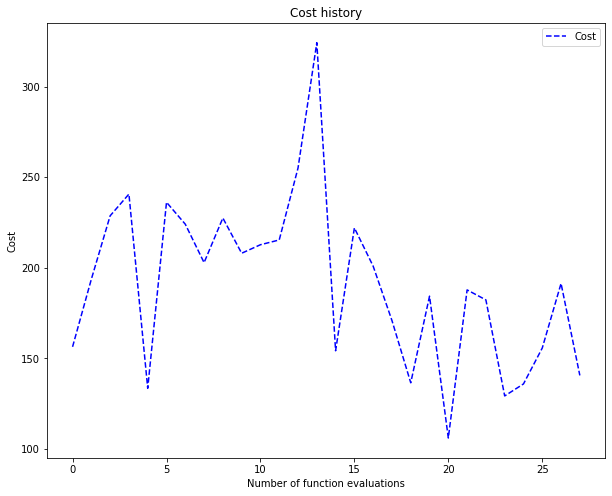

In [35]:
q_qiskit_shot.results.plot_cost()